<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Auto-Sarimax" data-toc-modified-id="Auto-Sarimax-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Auto Sarimax</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Index" data-toc-modified-id="Index-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Index</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# Data analysis
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import statsmodels.api as sm

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
PATH = "../../data/raw_data"

In [3]:
sector_51 = pd.read_excel(PATH + "/sector_51_daily_5:3:20 to 23:11:23.xlsx")
sector_51

,CENTRAL POLLUTION CONTROL BOARD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,CONTINUOUS AMBIENT AIR QUALITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Date: Thursday, Nov 23 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time: 12:24:26 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,Haryana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City,Gurugram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1370,19-11-2023 00:00,20-11-2023 00:00,149.81,234.32,16.35,15.63,20.79,1.87,10.31
1371,20-11-2023 00:00,21-11-2023 00:00,177.53,321.96,15.1,11.77,19.21,2.51,34.88
1372,21-11-2023 00:00,22-11-2023 00:00,150.27,222.25,15.1,11.78,19.21,2.27,49.94
1373,22-11-2023 00:00,23-11-2023 00:00,173,281.5,15.1,11.77,19.21,1.93,49.94


In [4]:
sector_51 = sector_51[15:]

In [5]:
columns = sector_51.iloc[0,:]


In [6]:
sector_51.columns = columns


In [7]:
sector_51.columns.name = ""

In [8]:
sector_51.reset_index(inplace=True)

In [9]:
sector_51.drop(columns=['index'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_34560/1384764267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(columns=['index'], inplace=True)


In [10]:
sector_51.drop(index=0, inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_34560/1066287836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(index=0, inplace=True)


In [11]:
sector_51

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone
1,05-03-2020 00:00,06-03-2020 00:00,36.51,73.15,5.91,24.28,30.19,0.51,71.07
2,06-03-2020 00:00,07-03-2020 00:00,22.23,39.15,5.89,23.24,29.12,0.45,55.32
3,07-03-2020 00:00,08-03-2020 00:00,41.44,77.68,8.54,21.67,30.2,0.63,46.15
4,08-03-2020 00:00,09-03-2020 00:00,62.64,130.39,18.77,24.16,42.94,0.86,41.67
5,09-03-2020 00:00,10-03-2020 00:00,83.74,127.54,4.88,22.1,26.98,0.68,49.61
...,...,...,...,...,...,...,...,...,...
1355,19-11-2023 00:00,20-11-2023 00:00,149.81,234.32,16.35,15.63,20.79,1.87,10.31
1356,20-11-2023 00:00,21-11-2023 00:00,177.53,321.96,15.1,11.77,19.21,2.51,34.88
1357,21-11-2023 00:00,22-11-2023 00:00,150.27,222.25,15.1,11.78,19.21,2.27,49.94
1358,22-11-2023 00:00,23-11-2023 00:00,173,281.5,15.1,11.77,19.21,1.93,49.94


In [12]:
sector_51.drop(columns=['To Date'], inplace=True)


/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_34560/2542681804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(columns=['To Date'], inplace=True)


In [13]:
sector_51

,From Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone
1,05-03-2020 00:00,36.51,73.15,5.91,24.28,30.19,0.51,71.07
2,06-03-2020 00:00,22.23,39.15,5.89,23.24,29.12,0.45,55.32
3,07-03-2020 00:00,41.44,77.68,8.54,21.67,30.2,0.63,46.15
4,08-03-2020 00:00,62.64,130.39,18.77,24.16,42.94,0.86,41.67
5,09-03-2020 00:00,83.74,127.54,4.88,22.1,26.98,0.68,49.61
...,...,...,...,...,...,...,...,...
1355,19-11-2023 00:00,149.81,234.32,16.35,15.63,20.79,1.87,10.31
1356,20-11-2023 00:00,177.53,321.96,15.1,11.77,19.21,2.51,34.88
1357,21-11-2023 00:00,150.27,222.25,15.1,11.78,19.21,2.27,49.94
1358,22-11-2023 00:00,173,281.5,15.1,11.77,19.21,1.93,49.94


In [18]:
sector_51['From Date']

1       05-03-2020 00:00
2       06-03-2020 00:00
3       07-03-2020 00:00
4       08-03-2020 00:00
5       09-03-2020 00:00
              ...       
1355    19-11-2023 00:00
1356    20-11-2023 00:00
1357    21-11-2023 00:00
1358    22-11-2023 00:00
1359    23-11-2023 00:00
Name: From Date, Length: 1359, dtype: object

In [16]:
sector_51[-20:]

,From Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone
1340,04-11-2023 00:00,357.39,640.62,55.81,89.2,70.45,4.03,35.86
1341,05-11-2023 00:00,172.64,390.4,68.11,128.49,100.8,3.28,17.54
1342,06-11-2023 00:00,297.54,455.15,6.12,35.39,18.96,3.48,20.89
1343,07-11-2023 00:00,222.18,421.06,81.22,87.72,103.38,4.07,20.99
1344,08-11-2023 00:00,302.78,419.93,166.83,176.38,146.43,4.61,26.93
1345,09-11-2023 00:00,342.28,532.25,21.78,64.41,29.04,3.73,19.78
1346,10-11-2023 00:00,123.29,205.12,50.95,74.56,63.84,2.54,12.8
1347,11-11-2023 00:00,121.53,198.35,39.01,57.53,44.87,2.49,15.64
1348,12-11-2023 00:00,150.01,221.22,26.83,46.19,32.74,2.73,23.08
1349,13-11-2023 00:00,307.18,413.21,20.6,11.97,33.04,3.64,10.67


In [31]:
sector_51.index = pd.to_datetime(sector_51['From Date'],dayfirst=True)

In [33]:
sector_51[-30:]

,From Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone
From Date,,,,,,,,
2023-10-25,25-10-2023 00:00,138.2,235.26,46.76,52.34,55.61,1.38,30.42
2023-10-26,26-10-2023 00:00,150.31,325.29,48.87,53.01,56.49,1.4,30.5
2023-10-27,27-10-2023 00:00,155.06,314.72,121.43,59.24,118.92,2.2,30.39
2023-10-28,28-10-2023 00:00,143.38,280.44,131.71,76.85,137.67,2.45,30.17
2023-10-29,29-10-2023 00:00,92.04,161.83,39.7,74.59,62.08,1.94,31.2
2023-10-30,30-10-2023 00:00,106.16,171.23,18.13,72.35,44.23,1.48,30.17
2023-10-31,31-10-2023 00:00,163.24,252.5,7.58,79.73,46.53,1.57,44.34
2023-11-01,01-11-2023 00:00,90.8,156.81,40.16,69.99,58.54,2.04,30.18
2023-11-02,02-11-2023 00:00,169.72,295.43,121.61,89.89,98.44,3.39,30.39


In [38]:
sector_51[datetime(2023,11,14):]

,From Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone
From Date,,,,,,,,
2023-11-14,14-11-2023 00:00,255.45,382.83,41.01,46.24,51.6,4.47,10.3
2023-11-15,15-11-2023 00:00,185.14,347.84,53.57,42.98,47.47,3.11,10.41
2023-11-16,16-11-2023 00:00,399.47,460.7,45.6,45.84,34.66,2.82,10.34
2023-11-17,17-11-2023 00:00,253.84,438.72,130.01,75.42,77.08,3.27,10.3
2023-11-18,18-11-2023 00:00,165.8,284.23,42.4,66.68,42.47,1.95,10.31
2023-11-19,19-11-2023 00:00,149.81,234.32,16.35,15.63,20.79,1.87,10.31
2023-11-20,20-11-2023 00:00,177.53,321.96,15.1,11.77,19.21,2.51,34.88
2023-11-21,21-11-2023 00:00,150.27,222.25,15.1,11.78,19.21,2.27,49.94
2023-11-22,22-11-2023 00:00,173,281.5,15.1,11.77,19.21,1.93,49.94


# Auto Sarimax

In [28]:
df = pd.read_csv("../../data/cleaned_data/Forecasting_time_series/sector_51_daily_aqi.csv")
df

,Unnamed: 0,Date,AQI
0,0,2020-03-05,73.0
1,1,2020-03-06,55.0
2,2,2020-03-07,78.0
3,3,2020-03-08,120.0
4,4,2020-03-09,179.0
...,...,...,...
1387,1387,2023-12-22,207.0
1388,1388,2023-12-23,246.0
1389,1389,2023-12-24,244.0
1390,1390,2023-12-25,185.0


In [29]:
df.set_index('Date', inplace=True)

In [30]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
df.index = pd.to_datetime(df.index)

In [32]:
df

,AQI
Date,
2020-03-05,73.0
2020-03-06,55.0
2020-03-07,78.0
2020-03-08,120.0
2020-03-09,179.0
...,...
2023-12-22,207.0
2023-12-23,246.0
2023-12-24,244.0


In [8]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1368 non-null   datetime64[ns]
 1   AQI     1368 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.5 KB


In [11]:
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month 
df['Year'] = df.Date.dt.year

In [12]:
df

,Date,AQI,Day,Month,Year
0,2020-03-05,73.0,5,3,2020
1,2020-03-06,55.0,6,3,2020
2,2020-03-07,78.0,7,3,2020
3,2020-03-08,120.0,8,3,2020
4,2020-03-09,179.0,9,3,2020
...,...,...,...,...,...
1363,2023-11-28,219.0,28,11,2023
1364,2023-11-29,326.0,29,11,2023
1365,2023-11-30,348.0,30,11,2023
1366,2023-12-01,282.0,1,12,2023


In [13]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
train_end = df[df['Date'] < datetime(2023, 11, 25)]
test_end = df[df['Date'] > datetime(2023, 11, 25)]

In [18]:
train_end[['Day','Month','Year']]

,Date,AQI,Day,Month,Year
0,2020-03-05,73.0,5,3,2020
1,2020-03-06,55.0,6,3,2020
2,2020-03-07,78.0,7,3,2020
3,2020-03-08,120.0,8,3,2020
4,2020-03-09,179.0,9,3,2020
...,...,...,...,...,...
1355,2023-11-20,344.0,20,11,2023
1356,2023-11-21,323.0,21,11,2023
1357,2023-11-22,341.0,22,11,2023
1358,2023-11-23,442.0,23,11,2023


In [14]:
train_data = df[:train_end]['AQI']
test_data = df[train_end + timedelta(days=1):test_end]['AQI']

type: cannot do slice indexing on RangeIndex with these indexers [2023-11-25 00:00:00] of type datetime

,Date,AQI,Day,Month,Year
0,2020-03-05,73.0,5,3,2020
1,2020-03-06,55.0,6,3,2020
2,2020-03-07,78.0,7,3,2020
3,2020-03-08,120.0,8,3,2020
4,2020-03-09,179.0,9,3,2020
...,...,...,...,...,...
1355,2023-11-20,344.0,20,11,2023
1356,2023-11-21,323.0,21,11,2023
1357,2023-11-22,341.0,22,11,2023
1358,2023-11-23,442.0,23,11,2023


In [23]:
train_end[['Day','Month']]
train_end['AQI']

,Day,Month
0,5,3
1,6,3
2,7,3
3,8,3
4,9,3
...,...,...
1355,20,11
1356,21,11
1357,22,11
1358,23,11


0        73.0
1        55.0
2        78.0
3       120.0
4       179.0
        ...  
1355    344.0
1356    323.0
1357    341.0
1358    442.0
1359    483.0
Name: AQI, Length: 1360, dtype: float64

In [21]:
rf = RandomForestClassifier()
rf.fit(train_end[['Day','Month']], train_end['AQI'])

RandomForestClassifier()

In [22]:
rf.score(test_end[['Day','Month']], test_end['AQI'])

0.0

In [25]:
rf_pred = rf.predict(test_end[['Day','Month']])
rf_pred

array([324., 373., 305., 401., 393., 325., 363.])

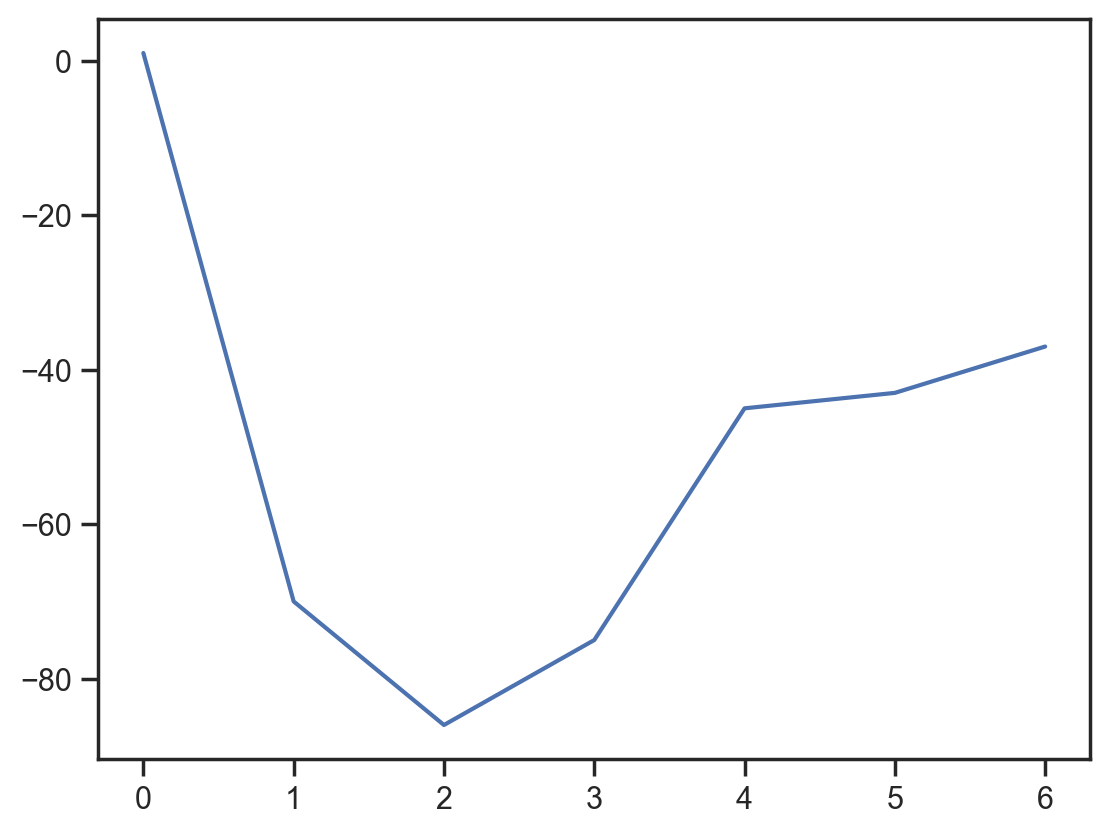

In [33]:
plt.plot(test_end['AQI'].values - rf_pred)

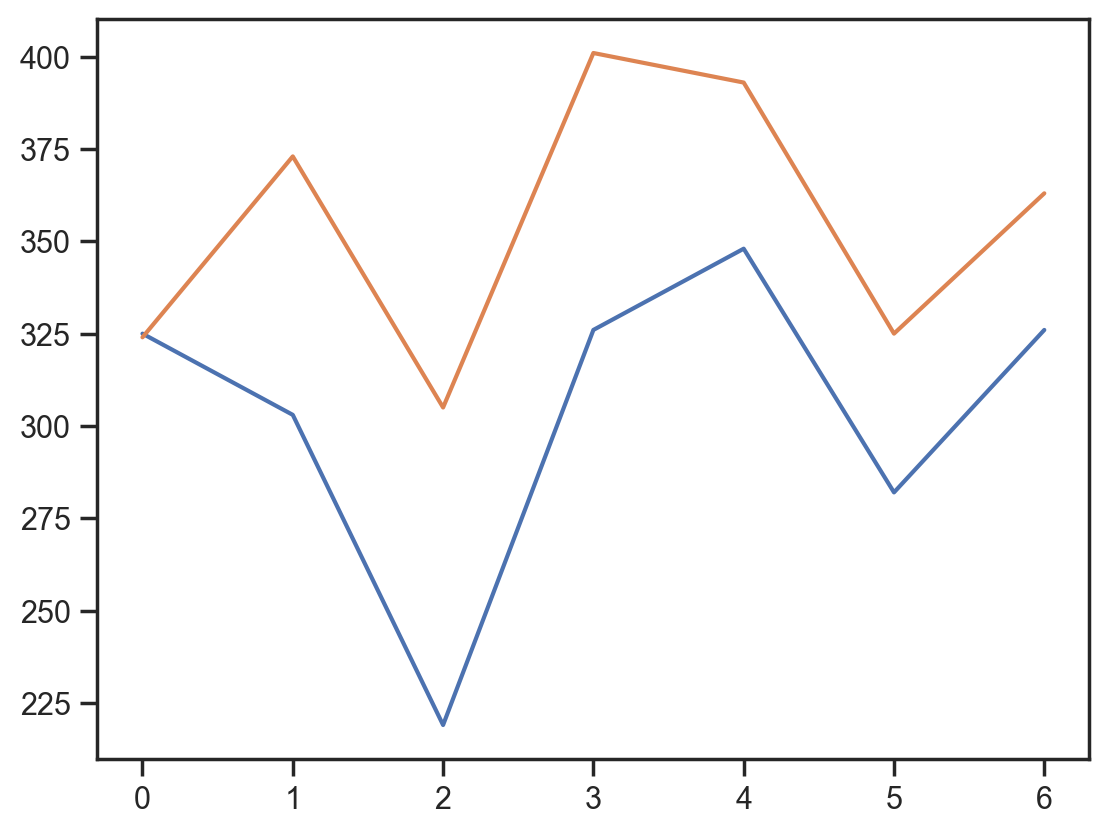

In [29]:
plt.plot(test_end['AQI'].values)
plt.plot(rf_pred)

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn import tree

In [32]:
mean_absolute_error(test_end['AQI'].values, rf_pred)

51.0

In [40]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1662518908),
 DecisionTreeClassifier(max_features='sqrt', random_state=882655053),
 DecisionTreeClassifier(max_features='sqrt', random_state=849809776),
 DecisionTreeClassifier(max_features='sqrt', random_state=1228707546),
 DecisionTreeClassifier(max_features='sqrt', random_state=2037579325),
 DecisionTreeClassifier(max_features='sqrt', random_state=2065524272),
 DecisionTreeClassifier(max_features='sqrt', random_state=1342846988),
 DecisionTreeClassifier(max_features='sqrt', random_state=1082801392),
 DecisionTreeClassifier(max_features='sqrt', random_state=1015076182),
 DecisionTreeClassifier(max_features='sqrt', random_state=1178000463),
 DecisionTreeClassifier(max_features='sqrt', random_state=548625380),
 DecisionTreeClassifier(max_features='sqrt', random_state=805872960),
 DecisionTreeClassifier(max_features='sqrt', random_state=561984181),
 DecisionTreeClassifier(max_features='sqrt', random_state=1216768856),
 DecisionTr

type: string index out of range

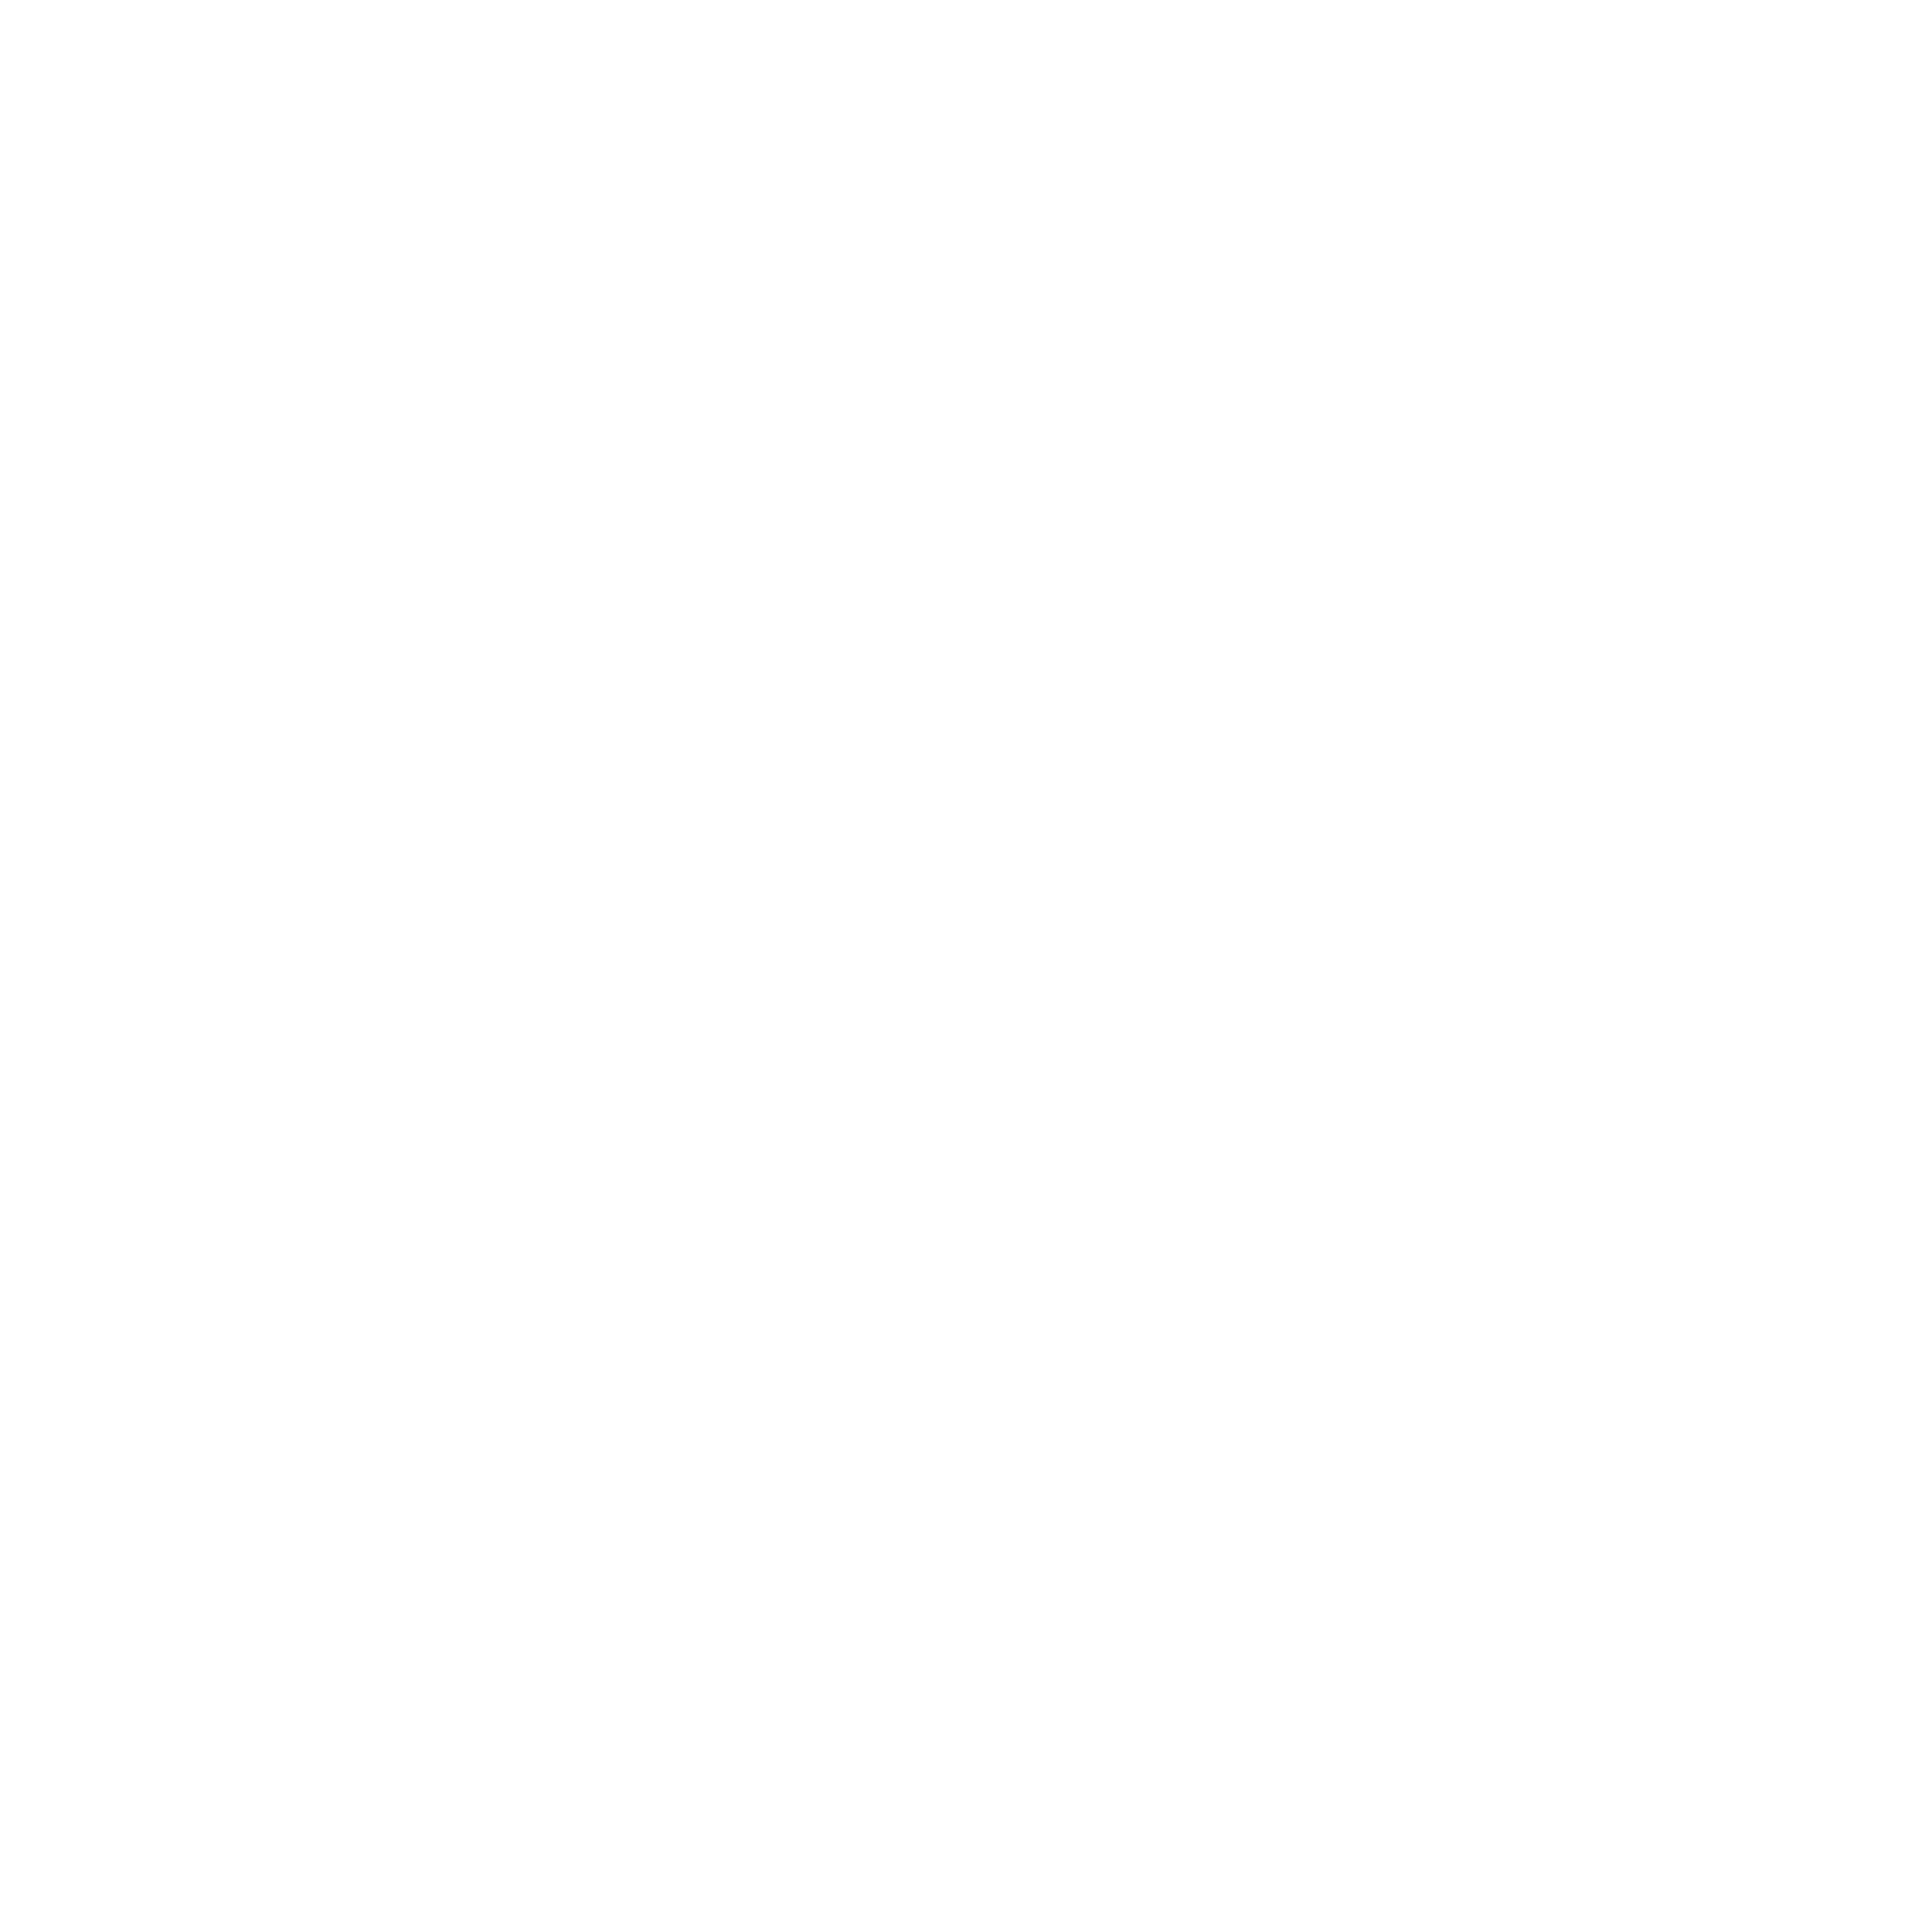

In [44]:
fn=['Day', 'Month']
cn='AQI'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [13]:
stepwise_fit = auto_arima(
    df['AQI'],
    suppress_warnings=True,
    d=0,  # non-seasonal difference order
    start_p=0,  # initial guess for p
    start_q=0,  # initial guess for q
    max_p=1,  # max value of p to test
    max_q=1,  # max value of q to test
    seasonal=True,  # is the time series seasonal? YES
    m=7,  # the seasonal period
    maxiter = 100,
    D=1, # seasonal difference order
    start_P=0,  # initial guess for P
    start_Q=0,  # initial guess for Q
    max_P=1,  # max value of P to test
    max_Q=1,  # max value of Q to test
    information_criterion='aic',# used to select best model
    trace=True,  # print results while training
#     error_action='ignore',  # ignore orders that don't work
#     stepwise=True  # apply intelligent order search
)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=16593.063, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=15645.463, Time=0.75 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=15682.382, Time=1.82 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=16591.170, Time=0.23 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=15978.497, Time=0.08 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=16378.688, Time=0.35 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=15647.414, Time=1.01 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=15851.705, Time=0.64 sec
 ARIMA(1,0,0)(1,1,0)[7]             : AIC=15643.526, Time=0.31 sec
 ARIMA(1,0,0)(0,1,0)[7]             : AIC=15976.526, Time=0.04 sec
 ARIMA(1,0,0)(1,1,1)[7]             : AIC=inf, Time=1.16 sec
 ARIMA(1,0,0)(0,1,1)[7]             : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(1,1,0)[7]             : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1368
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood               -7818.763
Date:                           Tue, 05 Dec 2023   AIC                          15643.526
Time:                                   21:12:30   BIC                          15659.174
Sample:                               03-05-2020   HQIC                         15649.384
                                    - 12-02-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6501      0.016     40.071      0.000       0.618       0.682
ar.S.L7       -0.4710      0.020    -23.734      0.000      -0.510      -0.432
sigma2      5711.4192    167.867     34.023      0.000    5382.405    6040.433
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               125.44
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Index

In [7]:
df

,AQI
Date,
2020-03-05,73.0
2020-03-06,55.0
2020-03-07,78.0
2020-03-08,120.0
2020-03-09,179.0
...,...
2023-11-28,219.0
2023-11-29,326.0
2023-11-30,348.0


In [9]:
train_data = df.loc[:, 'AQI']
order, seasonal_order =  (1, 0, 1), (1, 0, 1, 7)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
predictions = model_fit.forecast(5)
predictions = pd.Series(predictions)
predictions

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70295D+00    |proj g|=  1.61432D-01

At iterate    5    f=  5.62268D+00    |proj g|=  7.39977D-04


 This problem is unconstrained.



At iterate   10    f=  5.62186D+00    |proj g|=  2.27188D-03

At iterate   15    f=  5.61878D+00    |proj g|=  1.31866D-02

At iterate   20    f=  5.61424D+00    |proj g|=  3.29944D-03

At iterate   25    f=  5.61365D+00    |proj g|=  5.71950D-03

At iterate   30    f=  5.61307D+00    |proj g|=  2.79821D-03

At iterate   35    f=  5.61273D+00    |proj g|=  1.27206D-04

At iterate   40    f=  5.61271D+00    |proj g|=  8.18904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     48      1     0     0   3.460D-06   5.613D+00
  F =   5.6127049150554642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

2023-12-03    297.441347
2023-12-04    292.312240
2023-12-05    288.646591
2023-12-06    279.527313
2023-12-07    279.422190
Freq: D, Name: predicted_mean, dtype: float64

In [10]:
today = datetime.now().date()
yesterday = today - timedelta(days=1)
yesterday

datetime.date(2023, 12, 26)

In [13]:
predictions = pd.DataFrame(predictions)
predictions[yesterday:yesterday]

,predicted_mean


In [25]:
temp = pd.DataFrame({"A": [1,2,3],
             "B": [2,3,np.nan]}) 
temp

,A,B
0,1,2.0
1,2,3.0
2,3,NaN


In [27]:
np.isnan( temp.loc[2,'B'])

True

In [23]:
int(np.nan)

type: cannot convert float NaN to integer

In [44]:
df.ffill(inplace=True)

In [46]:
df[-40:-10]

,AQI
Date,
2023-11-17,411.0
2023-11-18,335.0
2023-11-19,323.0
2023-11-20,344.0
2023-11-21,323.0
2023-11-22,341.0
2023-11-23,442.0
2023-11-24,483.0
2023-11-25,330.0


In [55]:
train_end = df.index[-1] - timedelta(days=5)  # Except last 5 days
train_data = df.loc[:train_end, 'AQI']
test_data = df.loc[train_end + timedelta(days=1):, 'AQI']

# Train the model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(method='basinhopping')

predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
predictions

MAPE = round(mean_absolute_percentage_error(test_data, predictions) * 100, 2)  # Round it off to two decimal points
MAPE

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


basinhopping step 0: f 5.60783
basinhopping step 1: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 2: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 3: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 4: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 5: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 6: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 7: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 8: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 9: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
found new global minimum on step 9 with function value 5.60783
basinhopping step 10: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 11: f 5.60783 trial_f 5.60783 accepted 1  lowest_f 5.60783
basinhopping step 12: f 5.60783 trial_f 5.60783 accepted 1  lowest_f

KeyboardInterrupt: 

17.95

In [19]:
df_api = pd.read_csv('../../data/cron_job_data/sector_51_cron_output.csv')
df_api['Time'] = pd.to_datetime(df_api['Time'])
df_api.set_index('Time', inplace=True)


In [25]:
df_api

,AQI,Station_name
Time,,
2023-11-28 20:00:00,183,"Sector-51, Gurugram, India"
2023-11-28 21:00:00,203,"Sector-51, Gurugram, India"
2023-11-28 22:00:00,200,"Sector-51, Gurugram, India"
2023-11-28 23:00:00,200,"Sector-51, Gurugram, India"
2023-11-29 00:00:00,197,"Sector-51, Gurugram, India"
...,...,...
2024-03-19 22:00:00,153,"Sector-51, Gurugram, India"
2024-03-20 01:00:00,181,"Sector-51, Gurugram, India"
2024-03-20 03:00:00,213,"Sector-51, Gurugram, India"


In [29]:
df_api.loc['2024-03-15']

,AQI,Station_name
Time,,


In [14]:
df_api['AQI'].resample('D').mean()
# df_api = df_api['AQI'].resample('D').mean()
# df_api = pd.DataFrame(df_api)
# print(f"df_api columns {df_api.columns}")
# df_api['AQI'] = round(df_api['AQI'])

Time
2023-11-28    196.500000
2023-11-29    227.157895
2023-11-30    253.238095
2023-12-01    183.153846
2023-12-02    314.700000
                 ...    
2024-03-16    163.833333
2024-03-17    180.434783
2024-03-18    174.181818
2024-03-19    176.071429
2024-03-20    224.750000
Freq: D, Name: AQI, Length: 114, dtype: float64

In [11]:
df_api[-10:]

,AQI
Time,
2024-03-11,209.0
2024-03-12,189.0
2024-03-13,171.0
2024-03-14,207.0
2024-03-15,NaN
2024-03-16,164.0
2024-03-17,180.0
2024-03-18,174.0
2024-03-19,176.0
